그려야할 것

1. Coin market return distributions: distributions of daily, weekly, and monthly cryptocurrency returns and log returns

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from tools_ryu import mytool
from multi_run_v2.initialize_v2 import data_pp, make_market_index, screener

In [2]:
def make_weekly_return(series):
    w = (series+1).cumprod().pct_change(7).resample("W").last().dropna()
    return w

In [3]:
cmktcap = pd.read_pickle("Data/cmktcap_data_final.pickle")
cmkt_data = data_pp(cmktcap, vender="coinmarketcap")

In [ ]:
mkt_1 = make_market_index(price_df=cmkt_data["price"],
                          mktcap_df=cmkt_data["mktcap"],
                          vol_df=cmkt_data["vol"],
                          mktcap_thresh=1_000_000,
                          vol_thresh=1_000_000,
                          ma=False)

In [ ]:
mkt_ma = make_market_index(price_df=cmkt_data["price"],
                          mktcap_df=cmkt_data["mktcap"],
                          vol_df=cmkt_data["vol"],
                          mktcap_thresh=1_000_000,
                          vol_thresh=1_000_000,
                          ma=True)

In [ ]:
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [ ]:
daily_rtn = cmkt_data["price"].pct_change(fill_method=None)
btc = daily_rtn.loc[:, "1"].fillna(0)
eth = daily_rtn.loc["2015-08-07":, "1027"].fillna(0)
xrp = daily_rtn.loc["2013-08-04":, "52"] .fillna(0)

# 1. Market Return Plot

In [ ]:
(mkt_1+1).loc["2014":].cumprod().plot(figsize=(14,8), fontsize=13, c="grey", alpha=0.8)
(mkt_ma+1).loc["2014":].cumprod().plot(figsize=(14,8), fontsize=13, c="k", alpha=0.8)
plt.minorticks_off()
plt.axis()

plt.ylabel("\$ Value of Investment", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.legend(["Screening", "Moving Average Screening"])
plt.tight_layout();

In [ ]:
(mkt_ma+1).loc["2014":].cumprod().plot(figsize=(20,10), fontsize=13, c="blue", alpha=0.8, logy=True)

plt.minorticks_off()
plt.axis()

plt.ylabel("\$ Value of Investment", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.tight_layout();

In [ ]:
(mkt_ma+1).loc["2014":].cumprod().plot(figsize=(20,10), fontsize=13, c="blue", alpha=0.8, logy=True)
(btc.loc["2014":]+1).cumprod().plot(figsize=(20,10), fontsize=13, c="red",  alpha=0.8, sharex=True, logy=True)
plt.minorticks_off()
plt.axis()

plt.ylabel("\$ Value of Investment (Log Scale)", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.legend(["Coin Market", "Bitcoin"], fontsize=13)
plt.tight_layout();

In [ ]:
(mkt_1+1).loc["2015-08-07":].cumprod().plot(figsize=(14,8), fontsize=13, c="blue", alpha=0.8)
(eth+1).cumprod().plot(figsize=(14,8), fontsize=13, c="red",  alpha=0.8, sharex=True)
plt.minorticks_off()
plt.axis()

plt.ylabel("\$ Value of Investment", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.legend(["Coin Market", "Ethereum"])
plt.tight_layout();

In [ ]:
#  리플 데이터는 2013-08-04:
## mkt_1, mktma를 그릴 때는 리플을 2013년 12월 27일 부터 시작하도록 잘라줘야함

(mkt_ma+1).loc["2014":].cumprod().plot(figsize=(14,8), fontsize=13, c="blue", alpha=0.8) 
(xrp+1).loc["2014":].cumprod().plot(figsize=(14,8), fontsize=13, c="red",  alpha=0.8, sharex=True)
plt.minorticks_off()
plt.axis()

plt.ylabel("\$ Value of Investment", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.legend(["Coin Market", "Ripple"])
plt.tight_layout();

# 2. Return Distribution histogram

In [ ]:
# Daily
mkt_ma.plot(kind="hist", bins=25, align="mid", edgecolor="black", figsize=(9,7), fontsize=14)
plt.xlabel("Daily Return ", fontsize=13)
plt.ylabel("Freqeuncy", fontsize=13)
plt.xlim(-0.5,0.5)
plt.tight_layout()

In [ ]:
# Weekly Return
weekly_rtn = (mkt_ma+1).cumprod().pct_change(7).resample("W").last().dropna()

weekly_rtn.plot(kind="hist", bins=25, align="mid", edgecolor="black", figsize=(9,7), fontsize=14)
plt.xlabel("Weekly Return ", fontsize=12)
plt.ylabel("Freqeuncy", fontsize=12)
plt.xlim(-0.6,0.6)
plt.tight_layout()

In [ ]:
# Montly Return
monthly_rtn = (mkt_1+1).cumprod().pct_change(30).resample("M").last().dropna()

monthly_rtn.plot(kind="hist", bins=25, align="mid", edgecolor="black", figsize=(9,7), fontsize=14)
plt.xlabel("Montly Return ", fontsize=12)
plt.ylabel("Freqeuncy", fontsize=12)
plt.xlim(-0.6,1.5)
plt.tight_layout()

# 3. Table : Summary Statistics

In [ ]:
# JF Table 1
mask_jf = screener(cmkt_data["mktcap"],
                   cmkt_data["vol"],
                   1_000_000,
                   1_000_000,
                   ma=False).loc["2014":]

In [ ]:
for year in range(2014, 2024):
    cnt = mask_jf.loc[str(year)].count()
    print(f"{year}:", (cnt > 0).sum())

full = (mask_jf.count() > 0).sum()
print(f"full: {full}")

In [ ]:
mktcap = (mask_jf * cmkt_data["mktcap"].loc["2014":])
vol = (mask_jf * cmkt_data["vol"].loc["2014":])

print("            Market Cap                         Volume")
print("Year, Mean,      Median          Mean         Median")

for year in range(2014, 2024):
    sample = mktcap.loc[str(year)].values
    mean = np.nanmean(sample)
    median = np.nanmedian(sample)
    
    sample2 = vol.loc[str(year)].values
    mean2 = np.nanmean(sample2)
    median2 = np.nanmedian(sample2)
    print(year, round(mean, 2), round(median, 2),"|" ,round(mean2, 2), round(median2, 2))

In [ ]:
def print_summary(dict):
    col = [key for key, series in dict.items()]
    
    mean = [series.mean() for series in dict.values()]
    median = [series.median() for series in dict.values()]
    std = [series.std() for series in dict.values()]
    skew = [series.skew() for series in dict.values()]
    kurt = [series.kurt() for series in dict.values()]
    
    return pd.DataFrame([mean, median, std, skew, kurt], columns=col, index=["Mean","Median","STD","Skewness","Kurtosis"]).T

In [ ]:
# 데일리 리턴
print_summary({"Coin Market Return 1M":mkt.loc["2014":],
               "Coin Market Return 1M,1M":mkt_1.loc["2014":],
                "Coin Market Return 1M,1M (MA)":mkt_ma.loc["2014":],
               "Bitcoin Return":btc.loc["2014":],
               "Ripple Return": xrp.loc["2014":],
               "Ethereum Return":eth})

In [ ]:
mkt_weekly = make_weekly_return(mkt)
mkt_1_weekly = make_weekly_return(mkt_1)
mkt_ma_weekly = make_weekly_return(mkt_ma)
btc_weekly = make_weekly_return(btc)
xrp_weekly = make_weekly_return(xrp)
eth_weekly = make_weekly_return(eth)

# 위클리 리턴
print_summary({"Coin Market Return 1M":mkt_weekly.loc["2014":],
               "Coin Market Return 1M,1M":mkt_1_weekly.loc["2014":],
                "Coin Market Return 1M,1M (MA)":mkt_ma_weekly.loc["2014":],
               "Bitcoin Return":btc_weekly.loc["2014":],
               "Ripple Return": xrp_weekly.loc["2014":],
               "Ethereum Return":eth_weekly})

# 4. 교수님이 요청하셧던 Plot 들..

우하향하는 Plot

최근 n년간 Volume이 m보다 큰 모든 코인 수의 총 합을 PLot

In [ ]:
return_dict = {}

for year in ["2017", "2018","2019","2020","2021","2022","2023"]:
    vol = cmkt_data["vol"].loc[year]
    lst = []
    for value in [0, 5_000_00 , 1_000_000,3_000_000,7_000_000, 10_000_000, 30_000_000, 70_000_000, 100_000_000]:
        vol_mask = vol[vol > value].loc[year]
        find = vol_mask.dropna(axis=1, thresh=1).shape[1] #한번이라도 해당 년도에 포함되면 코인 수에 포함 함
        lst.append(find)
    return_dict[year] = lst

In [ ]:
plt.figure(figsize=(24,12))
#plt.grid()
plt.xlabel("Volume", fontsize=15)
plt.ylabel("The Number of Coin", fontsize=15)

for key, list in return_dict.items():
    plt.plot(range(len(list)), list, label=key)
    plt.xticks(range(len(list)),
               ["0", "0.5M", "1M","3M","7M","10M","30M","70M","100M"])
    plt.legend()

In [ ]:
# 마켓켑과 Volume을 다 걸자
return_dict = {}

for year in ["2017", "2018","2019","2020","2021","2022","2023"]:
    vol = cmkt_data["vol"].loc[year]
    mkt = cmkt_data["mktcap"].loc[year]
    lst = []
    for value in [0, 500_000 , 1_000_000, 3_000_000,7_000_000, 10_000_000, 30_000_000, 70_000_000, 100_000_000]:
        vol_mask = vol[vol > value].loc[year]
        mktcap_mask = mkt[mkt > value].loc[year]
        mask = vol_mask * mktcap_mask
        find = mask.dropna(axis=1, thresh=1).shape[1] # 한번 이라도 해당 년도에 포함되면 코인 수에 포함 함
        lst.append(find)
    return_dict[year] = lst

In [ ]:
plt.figure(figsize=(24,12))
#plt.grid()
plt.xlabel("Volume and Market Cap", fontsize=15)
plt.ylabel("The Number of Coin", fontsize=15)

for key, list in return_dict.items():
    plt.plot(range(len(list)), list, label=key)
    plt.xticks(range(len(list)),
               ["0", "0.5M", "1M","3M","7M","10M","30M","70M","100M"])
    plt.legend()

Number of Coin 변화 Plotting

In [6]:
mask = screener(mktcap_df=cmkt_data["mktcap"],
                vol_df=cmkt_data["vol"],
                mktcap_thresh=1_000_000,
                vol_thresh=1,
                ma=False)

mask_ma = screener(mktcap_df=cmkt_data["mktcap"],
                vol_df=cmkt_data["vol"],
                mktcap_thresh=1_000_000,
                vol_thresh=1,
                ma=True)

mask_1 = screener(mktcap_df=cmkt_data["mktcap"],
                  vol_df=cmkt_data["vol"],
                  mktcap_thresh=1_000_000,
                  vol_thresh=1_000_000,
                  ma=False)

mask_1_ma = screener(mktcap_df=cmkt_data["mktcap"],
                  vol_df=cmkt_data["vol"],
                  mktcap_thresh=1_000_000,
                  vol_thresh=1_000_000,
                  ma=True)

In [ ]:
mask.count(1).loc["2014":].plot(figsize=(15,9), c="blue", alpha=0.8)
mask_ma.loc["2014":].count(1).plot(figsize=(15,9), c="red", alpha=0.8)
#mask_ma.count(1).plot(figsize=(15,9))


plt.minorticks_off()
plt.axis()

plt.legend(["Market Cap 1M", "Market Cap 1M Moving Average"])
plt.xlabel("The Number of Coin", fontsize=12)
plt.ylabel("Date", fontsize=12)
plt.tight_layout()

In [ ]:
mask_1.count(1).loc["2014":].plot(figsize=(15,9), c="blue", alpha=0.8)
mask_1_ma.loc["2014":].count(1).plot(figsize=(15,9),c="red", alpha=0.8)
#mask_ma.count(1).plot(figsize=(15,9))


plt.minorticks_off()
plt.axis()

plt.legend(["Market Cap 1M and Volume 1M", "Market Cap 1M and Volume 1M : Moving Average"])
plt.xlabel("The Number of Coin", fontsize=12)
plt.ylabel("Date", fontsize=12)
plt.tight_layout()

In [ ]:
mask_ma.count(1).loc["2014":].plot(figsize=(15,9), c="blue", alpha=0.8)
mask_1_ma.loc["2014":].count(1).plot(figsize=(15,9),c="red", alpha=0.8)
#mask_ma.count(1).plot(figsize=(15,9))


plt.minorticks_off()
plt.axis()

plt.legend(["Market Cap 1M : Moving Average", "Market Cap 1M and Volume 1M : Moving Average"])
plt.xlabel("The Number of Coin", fontsize=12)
plt.ylabel("Date", fontsize=12)
plt.tight_layout()

### 전체를 다 그려보자

In [4]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False

In [7]:
mktcap_1m = mask_1_ma * cmkt_data["mktcap"]
vol_1m = mask_1_ma * cmkt_data["vol"]

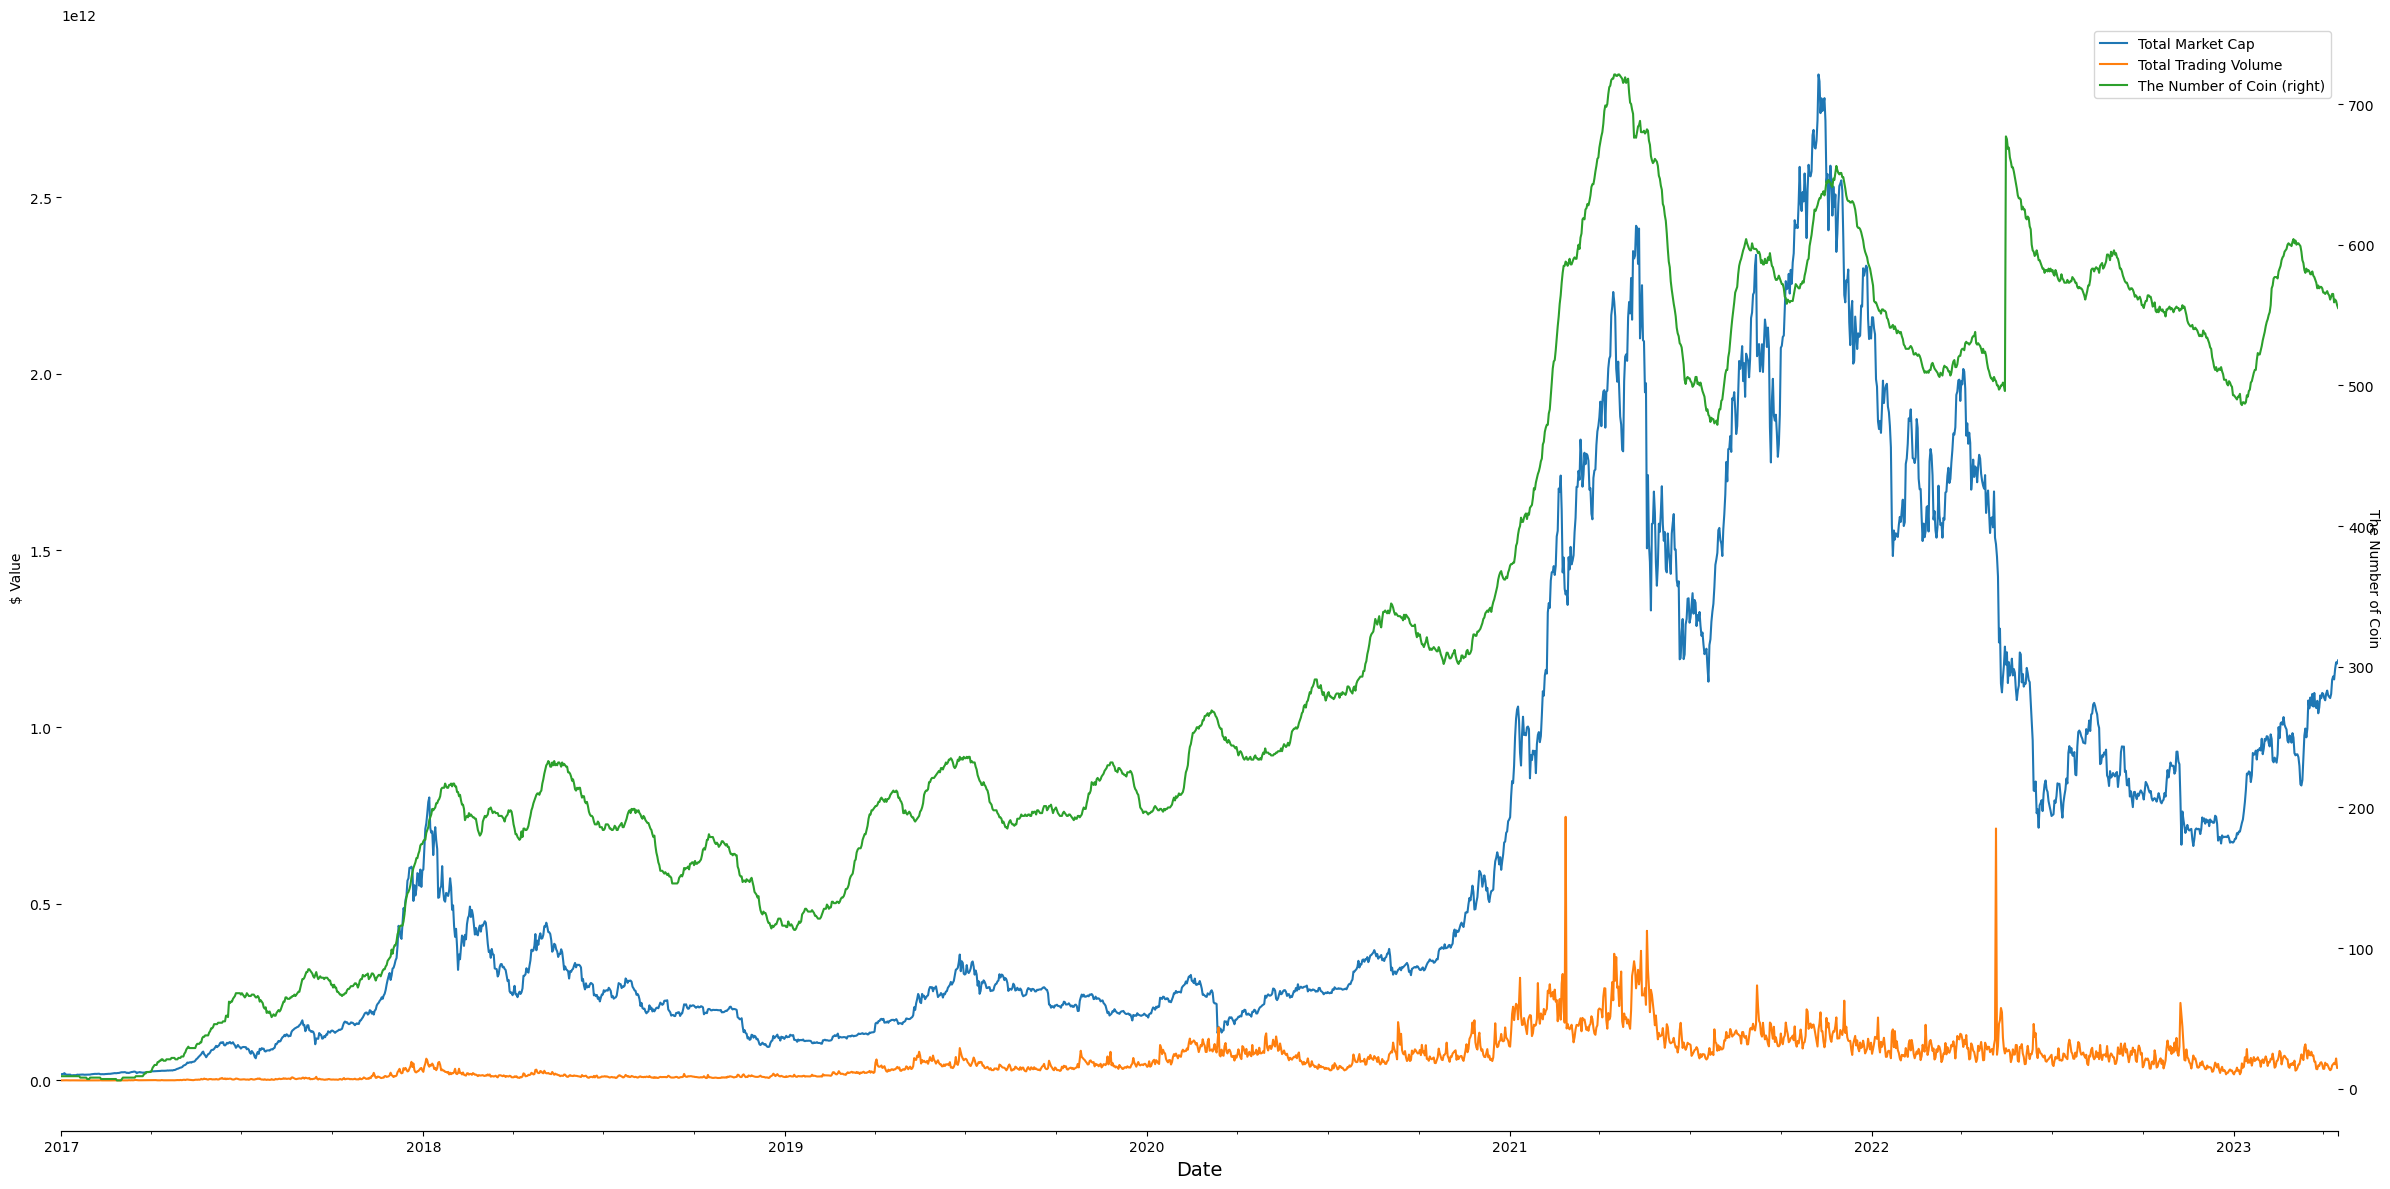

In [8]:
year = "2017"
fig, ax = plt.subplots(1,1, figsize=(24,10))

concat = pd.concat([mktcap_1m.loc[year:].sum(1),
                 vol_1m.loc[year:].sum(1),
                 mask_1_ma.loc[year:].count(1)], axis=1,
                keys=["Total Market Cap","Total Trading Volume","The Number of Coin"]) 
ax2 = concat.plot(ax=ax,
                  secondary_y="The Number of Coin",
                  figsize=(24,12))

plt.ylabel("The Number of Coin", fontsize=10, rotation=-90)
ax.set_xlabel("Date", fontsize=14)
ax2.set_ylabel("\$ Value", fontsize=10);
plt.tight_layout()